In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### importing dataframes 

In [2]:
df_rbh_ALL = pd.read_csv('rbh_all_hits_annotationDB_evaluation_TP_FP.tsv', sep='\t', index_col=0)
df_rbh_BH = pd.read_csv('rbh_only_best_rbh_hit_annotationDB_evaluation_TP_FP.tsv', sep='\t', index_col=0)

In [3]:
df_rbh_ALL[['annotation_category','fident', 'evalue']] = df_rbh_ALL.index.to_series().str.split('_', expand=True)[[0,2,3]]

df_rbh_BH[['annotation_category','fident', 'evalue']] = df_rbh_BH.index.to_series().str.split('_', expand=True)[[0,2,3]]

In [4]:
df_rbh_ALL.fident = df_rbh_ALL.fident.astype('float64')
df_rbh_ALL.evalue = df_rbh_ALL.evalue.astype('float64')
#df_rbh_ALL.COV_target = df_rbh_ALL.COV_target.astype('float64')

In [5]:
df_rbh_BH.fident = df_rbh_BH.fident.astype('float64')
df_rbh_BH.evalue = df_rbh_BH.evalue.astype('float64')
#df_rbh_BH.COV_target = df_rbh_BH.COV_target.astype('float64')

In [6]:
df_rbh_ALL

,ALL,1orMORE,CERO,NaN,ALL_TruePositive_query_count,1orMORE_TruePositive_query_count,CERO_FalsePositive_query_count,NaN_query_count,TruePositive,sum_TPFP,precision,TruePositive_x_sum_TPFP,annotation_category,fident,evalue
EC number_count_0.0_1e-30,10933,200,1524,155405,375,33,134,10488,11133,12657,0.879592,9792.501304,EC number,0.0,1.000000e-30
EC number_count_0.0_1e-20,14500,285,2608,150669,506,43,226,10471,14785,17393,0.850055,12568.057552,EC number,0.0,1.000000e-20
EC number_count_0.0_1e-15,16116,327,3251,148368,560,47,266,10466,16443,19694,0.834924,13728.660963,EC number,0.0,1.000000e-15
EC number_count_0.0_1e-10,17587,366,3806,146303,626,50,311,10455,17953,21759,0.825084,14812.730778,EC number,0.0,1.000000e-10
EC number_count_0.0_1e-05,18297,405,4205,145155,654,54,360,10441,18702,22907,0.816432,15268.904876,EC number,0.0,1.000000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eggNOG_count_0.7_1e-15,175,0,0,167887,10,0,0,10508,175,175,1.000000,175.000000,eggNOG,0.7,1.000000e-15
eggNOG_count_0.7_1e-10,175,0,0,167887,10,0,0,10508,175,175,1.000000,175.000000,eggNOG,0.7,1.000000e-10
eggNOG_count_0.7_1e-05,175,0,0,167887,10,0,0,10508,175,175,1.000000,175.000000,eggNOG,0.7,1.000000e-05
eggNOG_count_0.7_0.01,175,0,0,167887,10,0,0,10508,175,175,1.000000,175.000000,eggNOG,0.7,1.000000e-02


In [7]:
#True positive
df_rbh_ALL['TruePositive_query_count'] = df_rbh_ALL['ALL_TruePositive_query_count'] + df_rbh_ALL['1orMORE_TruePositive_query_count']
df_rbh_BH['TruePositive_query_count'] = df_rbh_BH['ALL_TruePositive_query_count'] + df_rbh_BH['1orMORE_TruePositive_query_count']

#calculo de precision
df_rbh_ALL['precision_from_counting'] = df_rbh_ALL['TruePositive_query_count'] / (df_rbh_ALL['TruePositive_query_count']  + df_rbh_ALL['CERO_FalsePositive_query_count'] )
df_rbh_BH['precision_from_counting'] = df_rbh_BH['TruePositive_query_count'] / (df_rbh_BH['TruePositive_query_count']  + df_rbh_BH['CERO_FalsePositive_query_count'] )

In [8]:
#precision contemplando el numero de TP
df_rbh_ALL['precision_from_counting_x_TP'] = df_rbh_ALL['TruePositive_query_count'] * df_rbh_ALL['precision_from_counting'] 
df_rbh_BH['precision_from_counting_x_TP'] = df_rbh_BH['TruePositive_query_count'] * df_rbh_BH['precision_from_counting']

### filtering to get best performance for each findet "TruePositive_x_sum_TPFP"

In [9]:
df_rbh_ALL_best_performance = df_rbh_ALL.sort_values(['precision_from_counting_x_TP', 'evalue'], ascending=[False, True]).drop_duplicates(subset=['annotation_category','fident'], keep='first')

df_rbh_BH_best_performance = df_rbh_BH.sort_values(['precision_from_counting_x_TP', 'evalue'], ascending=[False,True]).drop_duplicates(subset=['annotation_category','fident'], keep='first')

## correlation 

In [10]:
display(df_rbh_BH.corr(method='spearman'))


display(df_rbh_ALL.corr(method='spearman'))

/tmp/ipykernel_3301321/1827409328.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df_rbh_BH.corr(method='spearman'))


,ALL,1orMORE,CERO,NaN,ALL_TruePositive_query_count,1orMORE_TruePositive_query_count,CERO_FalsePositive_query_count,NaN_query_count,TruePositive,sum_TPFP,precision,TruePositive_x_sum_TPFP,fident,evalue,TruePositive_query_count,precision_from_counting,precision_from_counting_x_TP
ALL,1.000000,0.635230,0.772785,-0.992780,1.000000,0.635230,0.772785,-0.881909,0.992211,0.992780,-0.222850,0.972233,-0.912034,0.143118,0.992211,-0.222850,0.972233
1orMORE,0.635230,1.000000,0.135808,-0.641422,0.635230,1.000000,0.135808,-0.505182,0.697493,0.641422,0.380593,0.747110,-0.491908,0.035105,0.697493,0.380593,0.747110
CERO,0.772785,0.135808,1.000000,-0.759635,0.772785,0.135808,1.000000,-0.719013,0.710825,0.759635,-0.746912,0.645530,-0.839319,0.138124,0.710825,-0.746912,0.645530
NaN,-0.992780,-0.641422,-0.759635,1.000000,-0.992780,-0.641422,-0.759635,0.887579,-0.992585,-1.000000,0.225792,-0.963737,0.915326,-0.136560,-0.992585,0.225792,-0.963737
ALL_TruePositive_query_count,1.000000,0.635230,0.772785,-0.992780,1.000000,0.635230,0.772785,-0.881909,0.992211,0.992780,-0.222850,0.972233,-0.912034,0.143118,0.992211,-0.222850,0.972233
1orMORE_TruePositive_query_count,0.635230,1.000000,0.135808,-0.641422,0.635230,1.000000,0.135808,-0.505182,0.697493,0.641422,0.380593,0.747110,-0.491908,0.035105,0.697493,0.380593,0.747110
CERO_FalsePositive_query_count,0.772785,0.135808,1.000000,-0.759635,0.772785,0.135808,1.000000,-0.719013,0.710825,0.759635,-0.746912,0.645530,-0.839319,0.138124,0.710825,-0.746912,0.645530
NaN_query_count,-0.881909,-0.505182,-0.719013,0.887579,-0.881909,-0.505182,-0.719013,1.000000,-0.871652,-0.887579,0.272078,-0.826539,0.799209,-0.153367,-0.871652,0.272078,-0.826539
TruePositive,0.992211,0.697493,0.710825,-0.992585,0.992211,0.697493,0.710825,-0.871652,1.000000,0.992585,-0.149609,0.987060,-0.895332,0.125691,1.000000,-0.149609,0.987060
sum_TPFP,0.992780,0.641422,0.759635,-1.000000,0.992780,0.641422,0.759635,-0.887579,0.992585,1.000000,-0.225792,0.963737,-0.915326,0.136560,0.992585,-0.225792,0.963737


/tmp/ipykernel_3301321/1827409328.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df_rbh_ALL.corr(method='spearman'))


,ALL,1orMORE,CERO,NaN,ALL_TruePositive_query_count,1orMORE_TruePositive_query_count,CERO_FalsePositive_query_count,NaN_query_count,TruePositive,sum_TPFP,precision,TruePositive_x_sum_TPFP,fident,evalue,TruePositive_query_count,precision_from_counting,precision_from_counting_x_TP
ALL,1.000000,0.630351,0.738164,-0.992666,0.987518,0.657661,0.751894,-0.955707,0.990198,0.992666,-0.228201,0.977371,-0.904482,0.157136,0.973975,-0.257924,0.947795
1orMORE,0.630351,1.000000,0.090234,-0.648155,0.611006,0.995539,0.107786,-0.684506,0.695497,0.648155,0.384717,0.737889,-0.476227,0.057934,0.700245,0.383857,0.779462
CERO,0.738164,0.090234,1.000000,-0.714877,0.738062,0.135885,0.993017,-0.674363,0.664540,0.714877,-0.785517,0.613774,-0.808741,0.150111,0.648894,-0.804351,0.547358
NaN,-0.992666,-0.648155,-0.714877,1.000000,-0.991265,-0.672410,-0.731580,0.969191,-0.994828,-1.000000,0.216802,-0.978716,0.909285,-0.151077,-0.987665,0.244494,-0.955587
ALL_TruePositive_query_count,0.987518,0.611006,0.738062,-0.991265,1.000000,0.641943,0.762544,-0.951332,0.983372,0.991265,-0.248364,0.965648,-0.906828,0.158542,0.987182,-0.279716,0.951688
1orMORE_TruePositive_query_count,0.657661,0.995539,0.135885,-0.672410,0.641943,1.000000,0.155469,-0.704600,0.717917,0.672410,0.345865,0.758995,-0.507289,0.065830,0.725561,0.343746,0.802392
CERO_FalsePositive_query_count,0.751894,0.107786,0.993017,-0.731580,0.762544,0.155469,1.000000,-0.680697,0.682394,0.731580,-0.760682,0.631545,-0.818744,0.161255,0.674573,-0.788857,0.573165
NaN_query_count,-0.955707,-0.684506,-0.674363,0.969191,-0.951332,-0.704600,-0.680697,1.000000,-0.960424,-0.969191,0.190770,-0.941799,0.883006,-0.144839,-0.955358,0.206643,-0.921032
TruePositive,0.990198,0.695497,0.664540,-0.994828,0.983372,0.717917,0.682394,-0.960424,1.000000,0.994828,-0.145249,0.993244,-0.888313,0.135221,0.989506,-0.173122,0.974806
sum_TPFP,0.992666,0.648155,0.714877,-1.000000,0.991265,0.672410,0.731580,-0.969191,0.994828,1.000000,-0.216802,0.978716,-0.909285,0.151077,0.987665,-0.244494,0.955587


# Simlpe data visualization 

In [11]:
df_rbh_ALL.set_index(['annotation_category','fident', 'evalue'])[['TruePositive_query_count', 'CERO_FalsePositive_query_count']].stack().to_frame().reset_index().sort_values('annotation_category')

,annotation_category,fident,evalue,level_3,0
0,EC number,0.00,1.000000e-30,TruePositive_query_count,408
593,EC number,0.30,1.000000e-15,CERO_FalsePositive_query_count,128
592,EC number,0.30,1.000000e-15,TruePositive_query_count,400
591,EC number,0.30,1.000000e-20,CERO_FalsePositive_query_count,121
590,EC number,0.30,1.000000e-20,TruePositive_query_count,379
...,...,...,...,...,...
382,eggNOG,0.15,1.000000e-15,TruePositive_query_count,1363
381,eggNOG,0.15,1.000000e-20,CERO_FalsePositive_query_count,458
380,eggNOG,0.15,1.000000e-20,TruePositive_query_count,1113
378,eggNOG,0.15,1.000000e-30,TruePositive_query_count,667


In [12]:
df_rbh_ALL.set_index(['annotation_category','fident', 'evalue'])[['precision_from_counting']].stack().to_frame().reset_index().sort_values('annotation_category')

,annotation_category,fident,evalue,level_3,0
0,EC number,0.00,1.000000e-30,precision_from_counting,0.752768
150,EC number,0.15,1.000000e-10,precision_from_counting,0.690928
149,EC number,0.15,1.000000e-15,precision_from_counting,0.696009
148,EC number,0.15,1.000000e-20,precision_from_counting,0.707895
147,EC number,0.15,1.000000e-30,precision_from_counting,0.750929
...,...,...,...,...,...
535,eggNOG,0.50,1.000000e-10,precision_from_counting,0.881944
534,eggNOG,0.50,1.000000e-15,precision_from_counting,0.879699
483,eggNOG,0.45,1.000000e-30,precision_from_counting,0.833333
485,eggNOG,0.45,1.000000e-15,precision_from_counting,0.846512


In [29]:
def ploting_for_both_df(df):
    
    df0 = df.set_index(['annotation_category','fident', 'evalue'])[['ALL_TruePositive_query_count', '1orMORE_TruePositive_query_count' ,'CERO_FalsePositive_query_count']].stack().to_frame().reset_index()#.sort_values('annotation_category')
    
    g = sns.FacetGrid(data = df0.sort_values(['annotation_category', 0], ascending = [False, False]), col="annotation_category", sharey=False, hue = 'level_3', aspect=1)
    #g.map(sns.barplot,'fident', 0, order = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ])
    g.map(sns.pointplot,'fident', 0, order = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ])
    #g.map(sns.boxplot,'fident', 0)
    
    #sns.barplot(data=df, x='annotation_category', y=0, hue='level_0')
    
    df1 = df.set_index(['annotation_category','fident', 'evalue'])[['precision_from_counting']].stack().to_frame().reset_index().sort_values('annotation_category')
    
    g1 = sns.FacetGrid(data = df1.sort_values(['annotation_category', 0], ascending = [False, False]), col="annotation_category", sharey=False, hue = 'level_3', aspect=1)
    #g.map(sns.barplot,'fident', 0, order = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ])
    g1.map(sns.pointplot,'fident', 0, order = [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ], color='salmon')
    #g.map(sns.boxplot,'fident', 0)    
    
    
    for axes in g.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
        
    for axes in g1.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
        
    g.add_legend()
    #return df

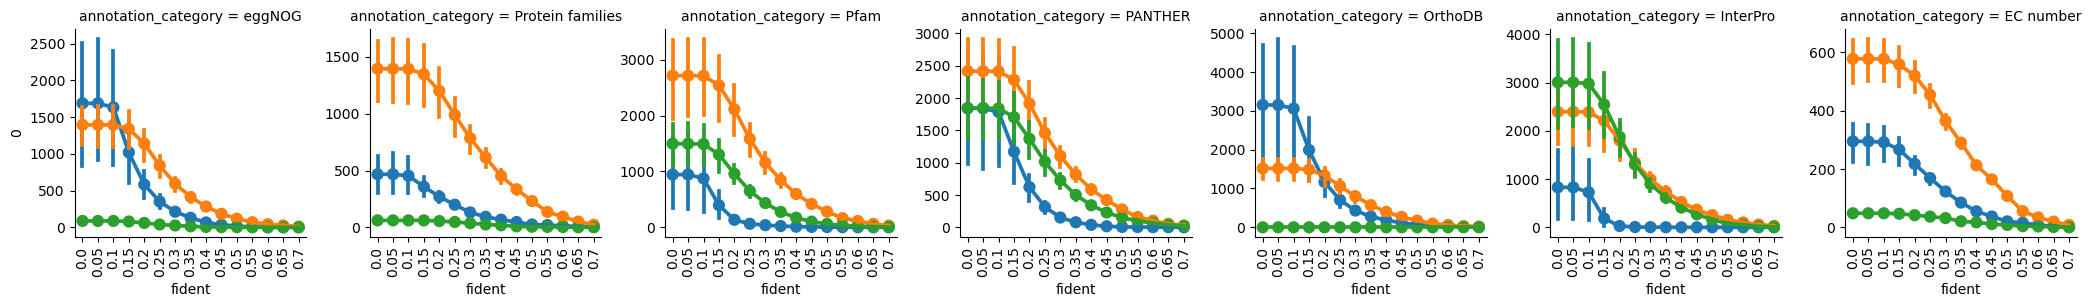

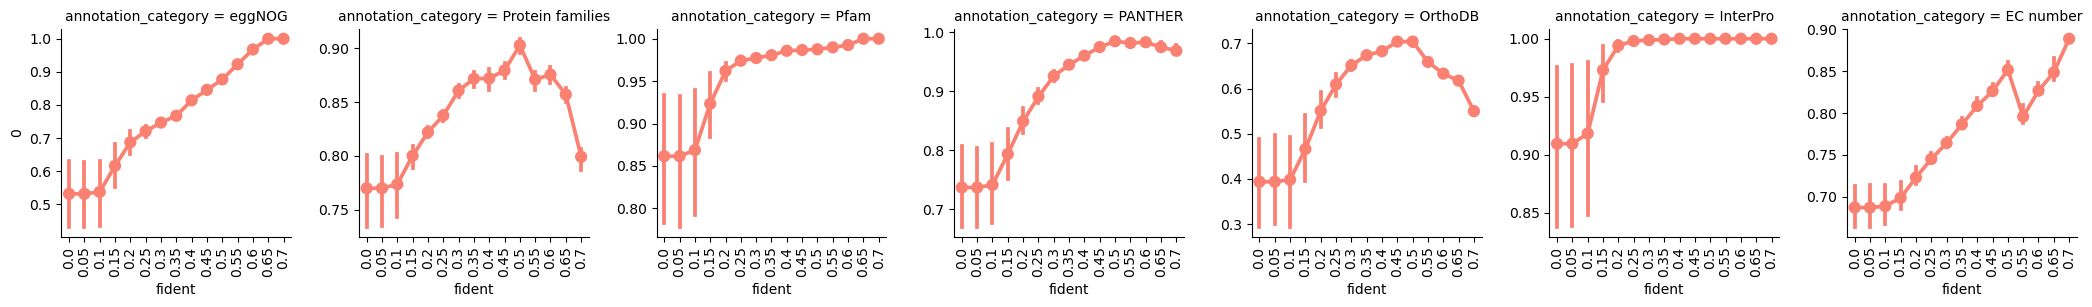

In [25]:
#solo hay desvio en EC number 0 porque el resto dan el mismo numero de cosas, no hay desvio en los datos porque lo mas determinante es el fident
ploting_for_both_df(df_rbh_ALL)

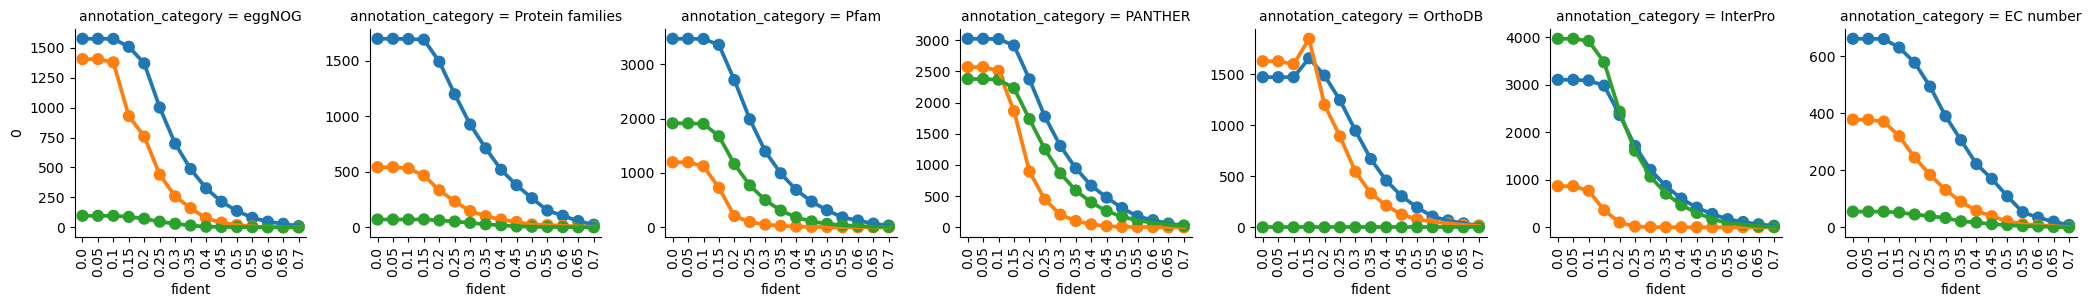

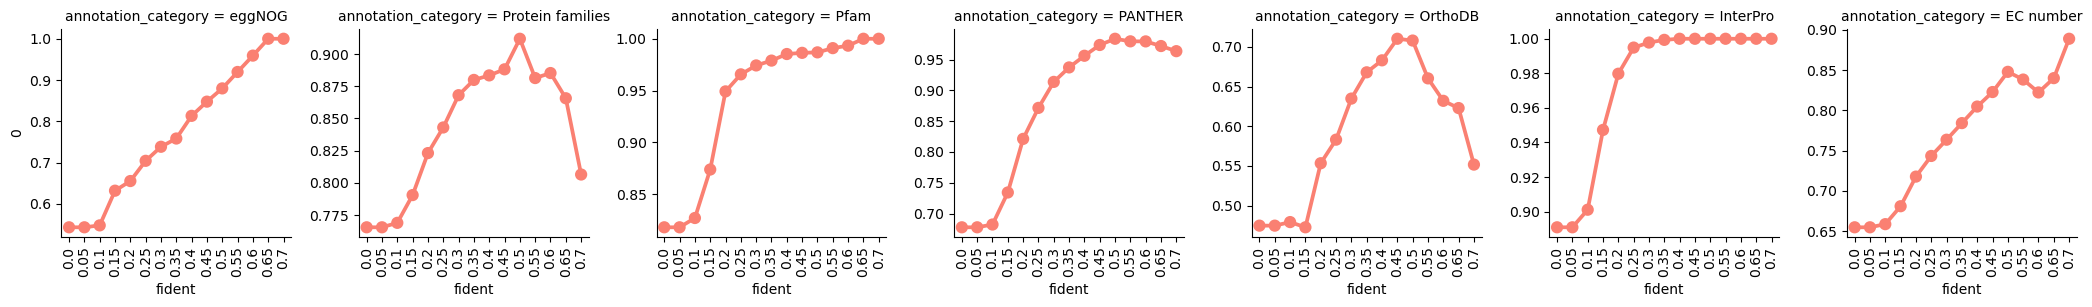

In [26]:
ploting_for_both_df(df_rbh_ALL_best_performance)

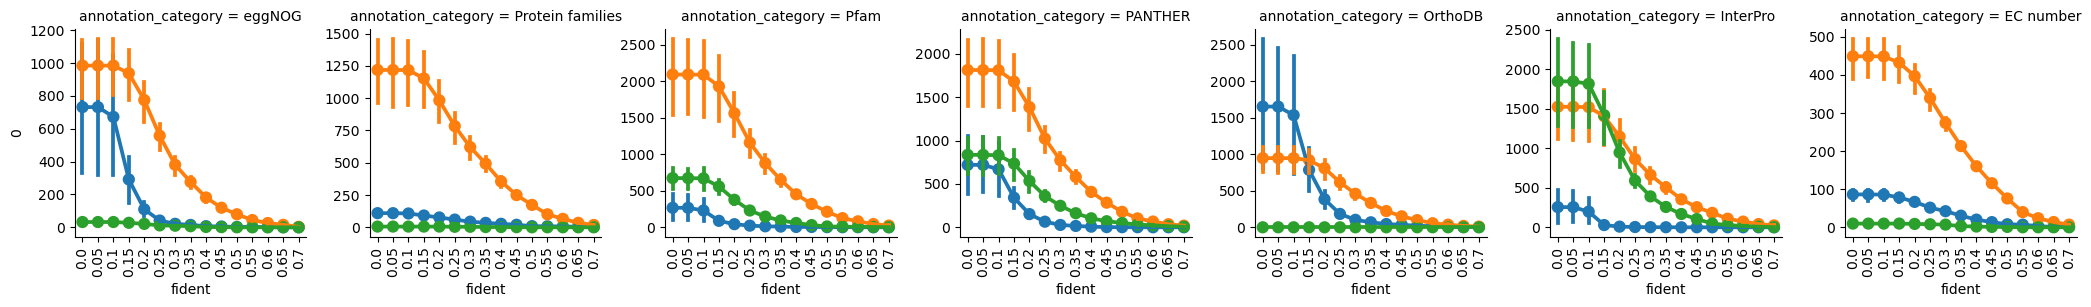

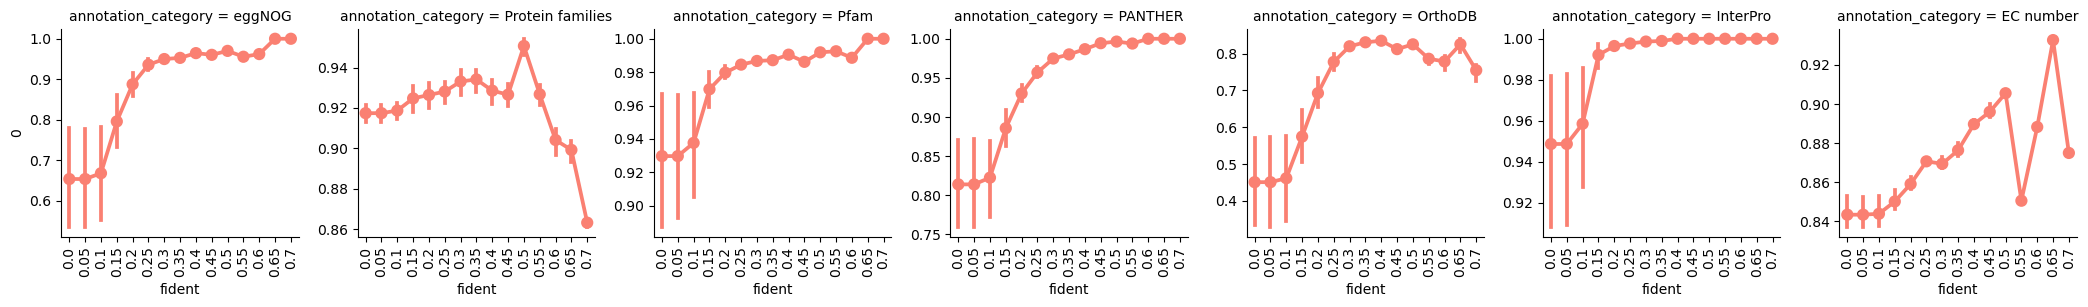

In [27]:
ploting_for_both_df(df_rbh_BH)

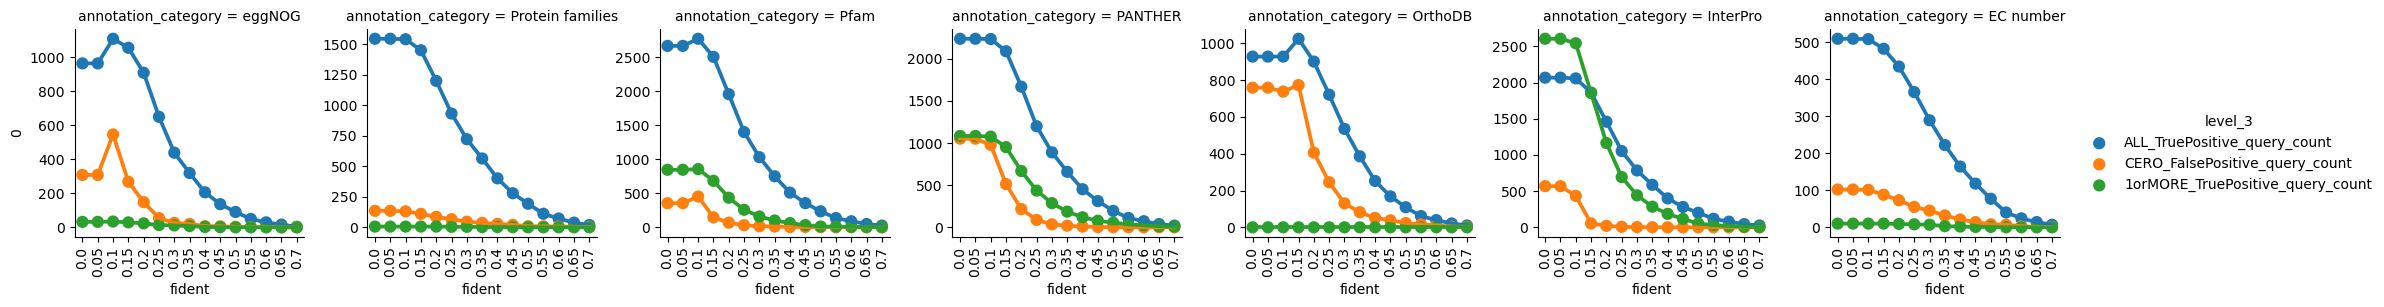

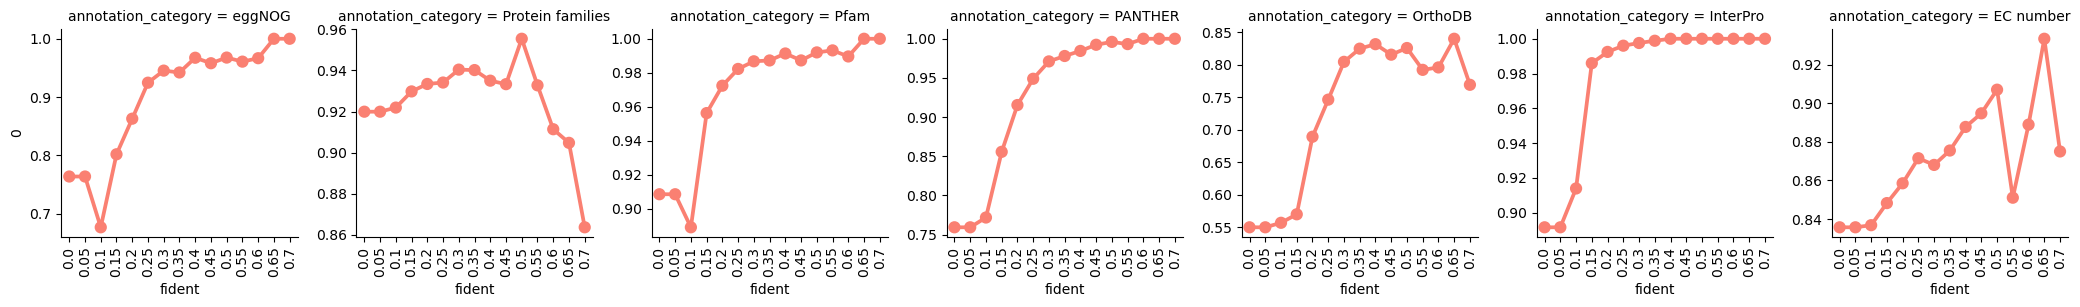

In [30]:
ploting_for_both_df(df_rbh_BH_best_performance)

In [35]:
df_rbh_BH_best_performance[df_rbh_BH_best_performance['fident'] == 0]

,ALL,1orMORE,CERO,NaN,ALL_TruePositive_query_count,1orMORE_TruePositive_query_count,CERO_FalsePositive_query_count,NaN_query_count,TruePositive,sum_TPFP,precision,TruePositive_x_sum_TPFP,annotation_category,fident,evalue,TruePositive_query_count,precision_from_counting,precision_from_counting_x_TP
InterPro_count_0.0_0.01,2069,2607,569,162817,2069,2607,569,10376,4676,5245,0.891516,4168.727550,InterPro,0.0,1.000000e-02,4676,0.891516,4168.727550
Pfam_count_0.0_1e-05,2668,846,354,164194,2668,846,354,10460,3514,3868,0.908480,3192.398139,Pfam,0.0,1.000000e-05,3514,0.908480,3192.398139
PANTHER_count_0.0_1e-05,2239,1085,1053,163685,2239,1085,1053,10448,3324,4377,0.759424,2524.326251,PANTHER,0.0,1.000000e-05,3324,0.759424,2524.326251
Protein families_count_0.0_0.01,1545,6,135,166376,1545,6,135,10502,1551,1686,0.919929,1426.809609,Protein families,0.0,1.000000e-02,1551,0.919929,1426.809609
eggNOG_count_0.0_1e-15,964,32,308,166758,964,32,308,10499,996,1304,0.763804,760.748466,eggNOG,0.0,1.000000e-15,996,0.763804,760.748466
OrthoDB_count_0.0_1e-15,928,0,759,166375,928,0,759,10499,928,1687,0.550089,510.482513,OrthoDB,0.0,1.000000e-15,928,0.550089,510.482513
EC number_count_0.0_0.01,509,10,102,167441,509,10,102,10506,519,621,0.835749,433.753623,EC number,0.0,1.000000e-02,519,0.835749,433.753623


In [18]:
##### HABLANDO CON PABLITO DECIDIMOS QUEDARNOS CON EL MEJOR RBH BASADOS EN LOS GRAFICOS ANTERIORES Y LA PRECISION. ###############

In [19]:
df_rbh_BH_best_performance[df_rbh_BH_best_performance['annotation_category'] == 'PANTHER']

,ALL,1orMORE,CERO,NaN,ALL_TruePositive_query_count,1orMORE_TruePositive_query_count,CERO_FalsePositive_query_count,NaN_query_count,TruePositive,sum_TPFP,precision,TruePositive_x_sum_TPFP,annotation_category,fident,evalue,TruePositive_query_count,precision_from_counting,precision_from_counting_x_TP
PANTHER_count_0.15_0.01,2091,952,513,164506,2091,952,513,10469,3043,3556,0.855737,2604.007030,PANTHER,0.15,1.000000e-02,3043,0.855737,2604.007030
PANTHER_count_0.1_1e-05,2236,1077,979,163770,2236,1077,979,10451,3313,4292,0.771901,2557.308714,PANTHER,0.10,1.000000e-05,3313,0.771901,2557.308714
PANTHER_count_0.0_1e-05,2239,1085,1053,163685,2239,1085,1053,10448,3324,4377,0.759424,2524.326251,PANTHER,0.00,1.000000e-05,3324,0.759424,2524.326251
PANTHER_count_0.05_1e-05,2239,1085,1053,163685,2239,1085,1053,10448,3324,4377,0.759424,2524.326251,PANTHER,0.05,1.000000e-05,3324,0.759424,2524.326251
PANTHER_count_0.2_1,1670,668,216,165508,1670,668,216,10489,2338,2554,0.915427,2140.267815,PANTHER,0.20,1.000000e+00,2338,0.915427,2140.267815
PANTHER_count_0.25_1,1200,436,88,166338,1200,436,88,10501,1636,1724,0.948956,1552.491879,PANTHER,0.25,1.000000e+00,1636,0.948956,1552.491879
PANTHER_count_0.3_1,890,287,35,166850,890,287,35,10506,1177,1212,0.971122,1143.010726,PANTHER,0.30,1.000000e+00,1177,0.971122,1143.010726
PANTHER_count_0.35_1,659,186,19,167198,659,186,19,10507,845,864,0.978009,826.417824,PANTHER,0.35,1.000000e+00,845,0.978009,826.417824
PANTHER_count_0.4_1,452,119,9,167482,452,119,9,10508,571,580,0.984483,562.139655,PANTHER,0.40,1.000000e+00,571,0.984483,562.139655
PANTHER_count_0.45_0.01,311,78,3,167670,311,78,3,10508,389,392,0.992347,386.022959,PANTHER,0.45,1.000000e-02,389,0.992347,386.022959


In [20]:
df_rbh_BH_best_performance[df_rbh_BH_best_performance['annotation_category'] == 'PANTHER']

,ALL,1orMORE,CERO,NaN,ALL_TruePositive_query_count,1orMORE_TruePositive_query_count,CERO_FalsePositive_query_count,NaN_query_count,TruePositive,sum_TPFP,precision,TruePositive_x_sum_TPFP,annotation_category,fident,evalue,TruePositive_query_count,precision_from_counting,precision_from_counting_x_TP
PANTHER_count_0.15_0.01,2091,952,513,164506,2091,952,513,10469,3043,3556,0.855737,2604.007030,PANTHER,0.15,1.000000e-02,3043,0.855737,2604.007030
PANTHER_count_0.1_1e-05,2236,1077,979,163770,2236,1077,979,10451,3313,4292,0.771901,2557.308714,PANTHER,0.10,1.000000e-05,3313,0.771901,2557.308714
PANTHER_count_0.0_1e-05,2239,1085,1053,163685,2239,1085,1053,10448,3324,4377,0.759424,2524.326251,PANTHER,0.00,1.000000e-05,3324,0.759424,2524.326251
PANTHER_count_0.05_1e-05,2239,1085,1053,163685,2239,1085,1053,10448,3324,4377,0.759424,2524.326251,PANTHER,0.05,1.000000e-05,3324,0.759424,2524.326251
PANTHER_count_0.2_1,1670,668,216,165508,1670,668,216,10489,2338,2554,0.915427,2140.267815,PANTHER,0.20,1.000000e+00,2338,0.915427,2140.267815
PANTHER_count_0.25_1,1200,436,88,166338,1200,436,88,10501,1636,1724,0.948956,1552.491879,PANTHER,0.25,1.000000e+00,1636,0.948956,1552.491879
PANTHER_count_0.3_1,890,287,35,166850,890,287,35,10506,1177,1212,0.971122,1143.010726,PANTHER,0.30,1.000000e+00,1177,0.971122,1143.010726
PANTHER_count_0.35_1,659,186,19,167198,659,186,19,10507,845,864,0.978009,826.417824,PANTHER,0.35,1.000000e+00,845,0.978009,826.417824
PANTHER_count_0.4_1,452,119,9,167482,452,119,9,10508,571,580,0.984483,562.139655,PANTHER,0.40,1.000000e+00,571,0.984483,562.139655
PANTHER_count_0.45_0.01,311,78,3,167670,311,78,3,10508,389,392,0.992347,386.022959,PANTHER,0.45,1.000000e-02,389,0.992347,386.022959


# BEST PARAMETER ALL DB

In [31]:
df_rbh_ALL_sum = df_rbh_ALL[df_rbh_ALL['annotation_category'].isin([ 'InterPro', 'Pfam', 'PANTHER'])].groupby(['fident','evalue'])['precision_from_counting_x_TP'].sum().to_frame().reset_index()

df_rbh_BH_sum = df_rbh_BH[df_rbh_BH['annotation_category'].isin(['InterPro', 'Pfam', 'PANTHER'])].groupby(['fident','evalue'])['precision_from_counting_x_TP'].sum().to_frame().reset_index()

df_rbh_BH_best_performance_sum = df_rbh_BH_best_performance[df_rbh_BH_best_performance['annotation_category'].isin(['InterPro', 'Pfam', 'PANTHER'])].groupby(['fident','evalue'])['precision_from_counting_x_TP'].sum().to_frame().reset_index()




In [22]:
df_rbh_ALL_sum.sort_values(['precision_from_counting_x_TP', 'fident', 'evalue'], ascending=[False, True, True])

,fident,evalue,precision_from_counting_x_TP
18,0.10,1.000000e-05,14425.191151
4,0.00,1.000000e-05,14355.626131
11,0.05,1.000000e-05,14355.626131
26,0.15,1.000000e-02,14281.704041
25,0.15,1.000000e-05,14093.459715
...,...,...,...
102,0.70,1.000000e-05,131.072727
103,0.70,1.000000e-02,131.072727
104,0.70,1.000000e+00,131.072727
99,0.70,1.000000e-20,127.075472


In [23]:
df_rbh_BH_sum.sort_values(['precision_from_counting_x_TP', 'fident', 'evalue'], ascending=[False, True, True])

,fident,evalue,precision_from_counting_x_TP
19,0.10,1.000000e-02,9971.475232
18,0.10,1.000000e-05,9912.720496
4,0.00,1.000000e-05,9852.685365
11,0.05,1.000000e-05,9852.685365
5,0.00,1.000000e-02,9825.984545
...,...,...,...
102,0.70,1.000000e-05,81.000000
103,0.70,1.000000e-02,81.000000
104,0.70,1.000000e+00,81.000000
99,0.70,1.000000e-20,78.000000


In [32]:
df_rbh_BH_best_performance_sum.sort_values(['precision_from_counting_x_TP', 'fident', 'evalue'], ascending=[False, True, True])

,fident,evalue,precision_from_counting_x_TP
6,0.15,1.000000e-02,9322.139502
5,0.10,1.000000e-02,7433.658739
7,0.20,1.000000e+00,7072.297955
0,0.00,1.000000e-05,5716.724389
2,0.05,1.000000e-05,5716.724389
8,0.25,1.000000e+00,4923.052659
1,0.00,1.000000e-02,4168.727550
3,0.05,1.000000e-02,4168.727550
9,0.30,1.000000e+00,3542.230309
4,0.10,1.000000e-05,2557.308714
